<a href="https://colab.research.google.com/github/gombergere/arthomas/blob/master/FakeDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://towardsdatascience.com/dataset-unavailable-no-problem-b5031311d59d

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [10]:
!pip install faker
from faker import Faker
fake = Faker()
fake.seed(4321)
timestamp=[]
ID=[]
phone=[]
age=[]
gender=[]
address=[]
checkin=[]
checkout=[]
name=[]

     |████████████████████████████████| 962kB 4.8MB/s 


In [0]:
for _ in range(100):
    timestamp.append(fake.date_time())
    phone.append(fake.phone_number())
    address.append(fake.country())
    checkin.append(fake.date_time_ad())
    checkout.append(fake.date_time_ad())
    name.append(fake.name())

In [0]:
ID=pd.Series(range(1,101))
age=np.random.randint(8, high=80, size=100)
gender=np.random.choice([0, 1], size=100, p=[.6, .4])

In [0]:
data= pd.DataFrame({'Timestamp':timestamp,'ID':ID,'name':name,'Phone number':phone,'age':age, 'gender':gender, 'address':address,'checkin':checkin,'checkout':checkout})

In [14]:
data.head(10)

,Timestamp,ID,name,Phone number,age,gender,address,checkin,checkout
0,1987-04-22 04:30:21,1,Christopher Smith,1251029074,47,0,India,0849-02-19 12:29:56,0930-06-02 06:03:56
1,2006-03-11 14:30:02,2,Brian Maxwell,349-385-6397,25,1,Colombia,1938-04-21 13:06:55,0789-03-28 04:38:33
2,1987-06-24 14:09:19,3,Peter Jones,353.146.7561x4781,47,1,Saint Helena,1479-06-05 10:06:36,0043-01-05 11:32:36
3,2009-03-07 08:46:04,4,Renee Fisher,8658133841,35,0,Belgium,1339-08-18 15:27:44,1190-08-03 17:20:43
4,2009-09-14 05:51:12,5,Maria Lopez,+1-812-904-6438x297,38,1,Guyana,0667-07-05 20:36:19,1406-10-28 09:28:41
5,1992-02-10 20:13:49,6,Robert Gilbert,(904)640-1033x35819,72,1,Lesotho,0736-03-30 16:44:06,1498-12-01 19:04:09
6,1977-09-13 00:27:23,7,Katherine Gentry,(211)143-4126,17,0,Korea,1572-03-04 18:02:08,1603-09-23 08:47:30
7,1981-05-09 20:40:18,8,Eric Diaz,+1-381-281-5181x5140,71,0,Czech Republic,1682-10-11 20:24:26,0735-05-22 16:36:39
8,1981-02-01 10:11:52,9,Jeanette Martin,9563564030,35,1,Switzerland,1410-10-17 07:20:48,0323-05-16 02:20:58
9,1994-06-29 10:29:54,10,Anthony Merritt,(742)732-8671x14329,24,0,Anguilla,1484-07-02 17:21:08,1191-03-17 01:26:08


In [0]:
data.gender.replace(1,'female',inplace=True)
data.gender.replace(0,'male',inplace=True)

In [16]:
data.gender.value_counts()

male      63
female    37
Name: gender, dtype: int64

In [17]:
data.checkin.dtype

dtype('O')

In [0]:
data['checkin']=pd.to_datetime(data.checkin, errors='coerce')
data['checkout']=pd.to_datetime(data.checkout, errors='coerce')
data['Timestamp']=pd.to_datetime(data.Timestamp, errors='coerce')

In [0]:
datee= pd.date_range(start='1/1/2017', end='1/08/2019', periods=15)
datee=pd.to_datetime(datee)

In [0]:
datee

In [0]:
data.checkin=data.Timestamp

In [22]:
data.sort_values(by='Timestamp',ascending=True)

,Timestamp,ID,name,Phone number,age,gender,address,checkin,checkout
54,1970-11-26 23:32:09,55,Stephen Eaton,754-921-8507x9204,70,female,Jordan,1970-11-26 23:32:09,NaT
48,1971-06-05 17:37:35,49,Steven Blair,+1-598-863-4332x5031,65,male,India,1971-06-05 17:37:35,NaT
64,1971-06-16 12:46:21,65,Dr. Deborah Salazar,(930)527-8944x6195,29,male,Sierra Leone,1971-06-16 12:46:21,NaT
57,1971-08-15 19:37:25,58,Kathryn George,418.945.3221,61,male,Cameroon,1971-08-15 19:37:25,NaT
20,1971-10-19 07:01:04,21,Brian Lyons,(499)704-1098x36702,76,male,Panama,1971-10-19 07:01:04,NaT
...,...,...,...,...,...,...,...,...,...
60,2015-01-03 03:38:05,61,Richard Thomas,(891)360-8557x479,56,male,Tanzania,2015-01-03 03:38:05,1769-03-20 12:30:54
52,2015-01-24 13:52:15,53,Bradley Frazier,833.579.1411,74,male,Senegal,2015-01-24 13:52:15,NaT
87,2015-04-03 13:41:46,88,Patrick Simmons,001-839-650-9962x07991,21,male,Cook Islands,2015-04-03 13:41:46,NaT
47,2017-04-24 23:13:40,48,Kara Allen,382-227-4930x13743,46,male,Bermuda,2017-04-24 23:13:40,NaT


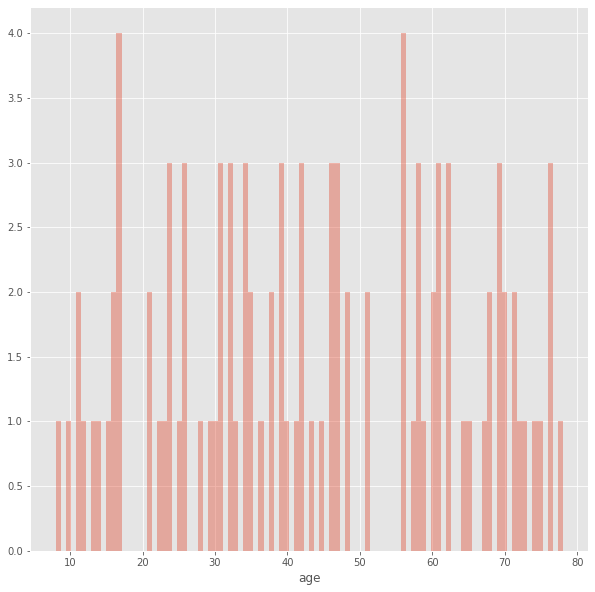

In [23]:
plt.figure(figsize=(10,10))
sns.distplot(data.age,bins=100, hist=True, kde=False)

In [0]:
import datetime

In [0]:
enddate = pd.to_datetime(data.checkin) + pd.DateOffset(days=3)

In [0]:
data['checkout']=enddate

In [27]:
data.head()

,Timestamp,ID,name,Phone number,age,gender,address,checkin,checkout
0,1987-04-22 04:30:21,1,Christopher Smith,1251029074,47,male,India,1987-04-22 04:30:21,1987-04-25 04:30:21
1,2006-03-11 14:30:02,2,Brian Maxwell,349-385-6397,25,female,Colombia,2006-03-11 14:30:02,2006-03-14 14:30:02
2,1987-06-24 14:09:19,3,Peter Jones,353.146.7561x4781,47,female,Saint Helena,1987-06-24 14:09:19,1987-06-27 14:09:19
3,2009-03-07 08:46:04,4,Renee Fisher,8658133841,35,male,Belgium,2009-03-07 08:46:04,2009-03-10 08:46:04
4,2009-09-14 05:51:12,5,Maria Lopez,+1-812-904-6438x297,38,female,Guyana,2009-09-14 05:51:12,2009-09-17 05:51:12


In [28]:
data.sort_values(by='Timestamp',ascending=True)

,Timestamp,ID,name,Phone number,age,gender,address,checkin,checkout
54,1970-11-26 23:32:09,55,Stephen Eaton,754-921-8507x9204,70,female,Jordan,1970-11-26 23:32:09,1970-11-29 23:32:09
48,1971-06-05 17:37:35,49,Steven Blair,+1-598-863-4332x5031,65,male,India,1971-06-05 17:37:35,1971-06-08 17:37:35
64,1971-06-16 12:46:21,65,Dr. Deborah Salazar,(930)527-8944x6195,29,male,Sierra Leone,1971-06-16 12:46:21,1971-06-19 12:46:21
57,1971-08-15 19:37:25,58,Kathryn George,418.945.3221,61,male,Cameroon,1971-08-15 19:37:25,1971-08-18 19:37:25
20,1971-10-19 07:01:04,21,Brian Lyons,(499)704-1098x36702,76,male,Panama,1971-10-19 07:01:04,1971-10-22 07:01:04
...,...,...,...,...,...,...,...,...,...
60,2015-01-03 03:38:05,61,Richard Thomas,(891)360-8557x479,56,male,Tanzania,2015-01-03 03:38:05,2015-01-06 03:38:05
52,2015-01-24 13:52:15,53,Bradley Frazier,833.579.1411,74,male,Senegal,2015-01-24 13:52:15,2015-01-27 13:52:15
87,2015-04-03 13:41:46,88,Patrick Simmons,001-839-650-9962x07991,21,male,Cook Islands,2015-04-03 13:41:46,2015-04-06 13:41:46
47,2017-04-24 23:13:40,48,Kara Allen,382-227-4930x13743,46,male,Bermuda,2017-04-24 23:13:40,2017-04-27 23:13:40


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


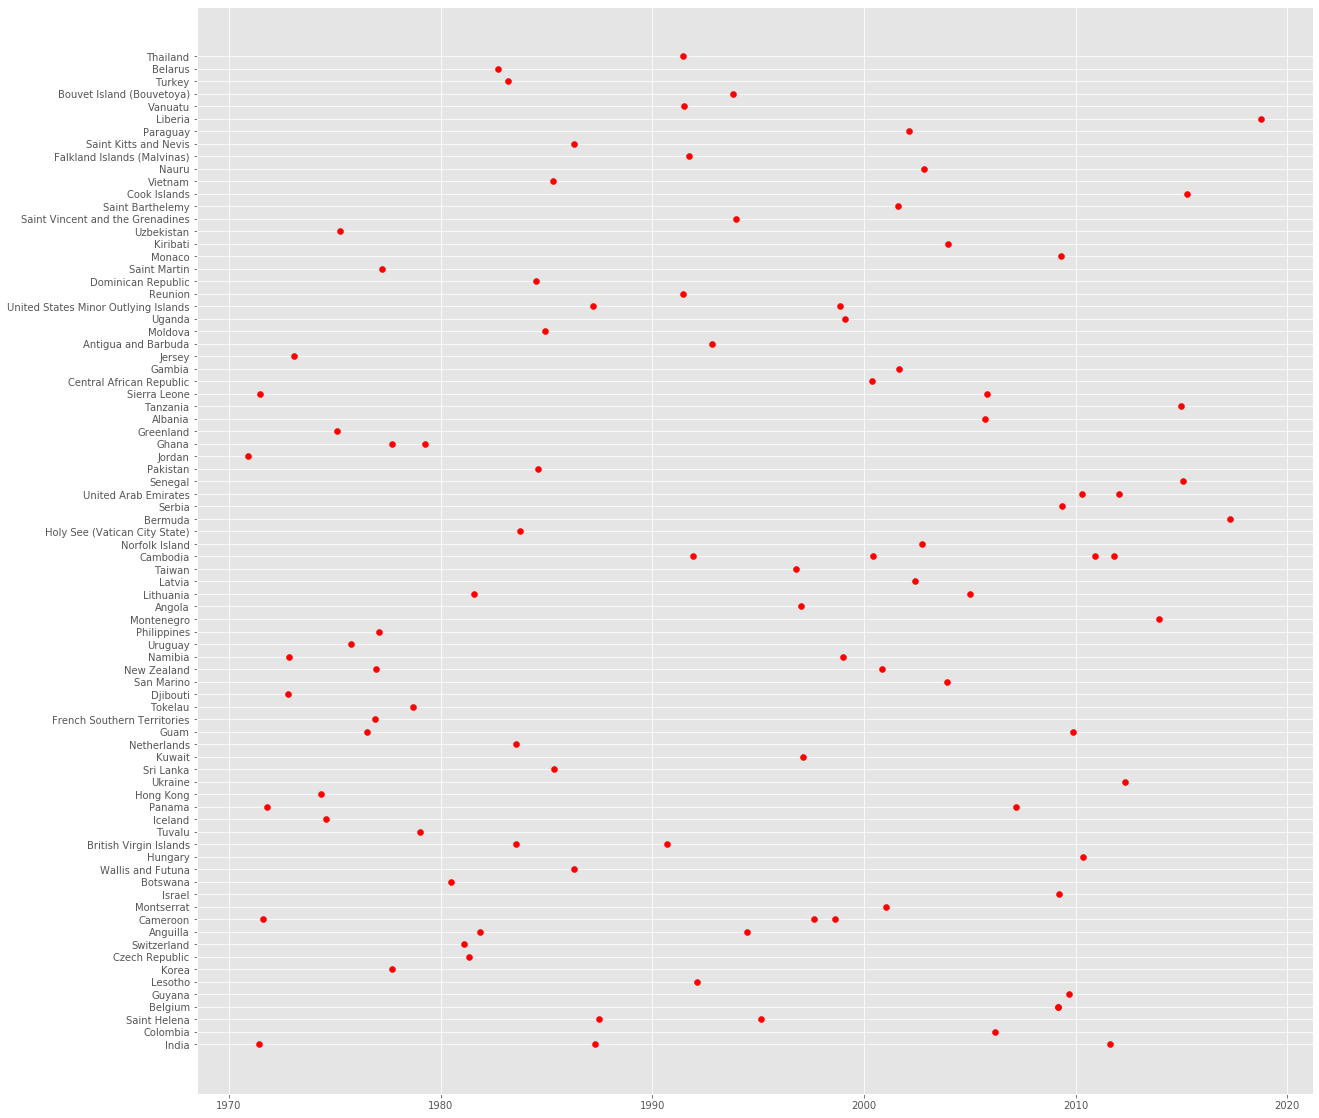

In [29]:
plt.figure(figsize=(20,20))
plt.scatter(list(data.checkin.values),list(data.address.values),color='r')

In [30]:
from plotly import __version__
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf


ImportError: ignored

In [31]:
data.iplot(kind='scatter',x='checkin',y='address',mode='markers',size=10, color = 'rgb(231, 9, 250)')

AttributeError: ignored